In [1]:
from pycalphad.tests.datasets import *
from pycalphad.core.solver import InteriorPointSolver
from pycalphad import equilibrium, Database, variables as v

ALFE_DBF = Database(ALFE_TDB)
ISSUE43_DBF = Database('issue43.tdb')

class ProblemSaver(InteriorPointSolver):
    saved_problem = [None]
    def solve(self, prob):
        self.saved_problem[0] = prob
        self.verbose = True
        return super(ProblemSaver, self).solve(prob)

ISSUE43_DBF._parameters.purge_tables()

#eq = equilibrium(ALFE_DBF, ['AL', 'FE', 'VA'], ['FCC_A1', 'AL13FE4'],
#                 {v.MU('FE'): -123110, v.T: 300, v.P: 1e5}, solver=ProblemSaver())
#eq = equilibrium(ISSUE43_DBF, ['AL', 'NI', 'CR', 'VA'], ['FCC_A1'],
#                     {v.X('AL'): 0.1, v.MU('CR'): -47269.29002414, v.T: 1273, v.P: 101325},
#                     solver=ProblemSaver(), global_min=True, verbose=True)
eq = equilibrium(ISSUE43_DBF, ['AL', 'NI', 'CR', 'VA'], ['FCC_A1', 'GAMMA_PRIME'],
                     {v.X('AL'): 0.3, v.X('CR'): 0.3, v.T: 800, v.P: 101325}, global_min=False,
                 user_starting_point=[('FCC_A1', [1, 1e5, 800, 1.18776923e-01, 8.80237725e-01, 9.85352235e-04, 1.00000000e+00]),
                                      ('GAMMA_PRIME', [1, 1e5, 800, 1.74048875e-01, 5.63475647e-02, 7.69603560e-01, 9.99778534e-01, 2.21458528e-04, 7.35394612e-09])],
                     solver=ProblemSaver())

Chemical Potentials [-8008.34550688 -8008.34550642 -6094.79943005]
[9.09090900e-06 8.97202970e-11 1.13636364e-08 3.03030259e-05
 3.03030259e-05 2.27272759e-05 9.09090900e-06 3.03030282e-05
 3.03030282e-05 2.27272734e-05 3.03030461e-05 3.03030461e-05
 2.27272533e-05 1.81818529e-05 1.81818555e-05]
[1.00000000e+00 1.01325000e+05 8.00000000e+02 3.00000000e-01
 3.00000000e-01 4.00000000e-01 1.00000000e+00 3.00000000e-01
 3.00000000e-01 4.00000000e-01 3.00000001e-01 3.00000001e-01
 3.99999999e-01 5.00002745e-01 4.99997255e-01]
Status: 0 b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'


In [2]:
import numpy as np
#soln = np.array(
#[1.00000000e+00, 1.01325000e+05, 1.27300000e+03, 1.96247274e-01,
# 3.89967388e-01, 4.13785338e-01, 1.00000000e+00, 1.00000000e+00]
#)
#soln = np.array(
#[1.00000000e+00, 1.01325000e+05, 1.27300000e+03, 2.72418536e-06,
# 1.14936909e-02, 9.88503585e-01, 1.00000000e+00, 1.00000000e+00]
#)
soln = np.array(
[1.00000000e+00, 1.01325000e+05, 8.00000000e+02, 1.18776923e-01,
 8.80237725e-01, 9.85352235e-04, 1.00000000e+00, 1.74048875e-01,
 5.63475647e-02, 7.69603560e-01, 9.99778534e-01, 2.21458528e-04,
 7.35394612e-09, 3.07527500e-01, 6.92472500e-01]
)

In [3]:
selected_index = 5
step = 1e-2
inputs = np.arange(1e-12,1-1e-12,step)
obj = np.zeros_like(inputs)
obj_single0 = np.zeros_like(inputs)
obj_single1 = np.zeros_like(inputs)
error = np.zeros_like(inputs)
for idx, val in enumerate(inputs):
    copy_of_soln = np.array(soln)
    copy_of_soln[selected_index] = val
    copy_of_soln[selected_index-1] = 0.5 - val/2
    copy_of_soln[selected_index-2] = 0.5 - val/2
    obj[idx] = ProblemSaver.saved_problem[0].chemical_potentials(copy_of_soln, selected_phase_idx=None)[1]
    obj_single0[idx] = ProblemSaver.saved_problem[0].chemical_potentials(copy_of_soln, selected_phase_idx=0)[1]
    obj_single1[idx] = ProblemSaver.saved_problem[0].chemical_potentials(copy_of_soln, selected_phase_idx=1)[1]

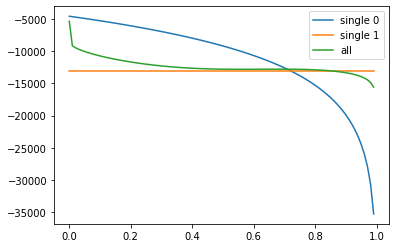

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

#plt.semilogy(inputs, error)
plt.plot(inputs, obj_single0, label='single 0')
plt.plot(inputs, obj_single1, label='single 1')
plt.plot(inputs, obj, label='all')
plt.legend(loc='best')
#plt.ylim((1e-13,1e-6))

In [5]:
ProblemSaver.saved_problem[0].constraints(copy_of_soln)

array([ 1.00000000e+00,  1.01325000e+05,  8.00000000e+02, -1.88897786e-11,
        0.00000000e+00, -3.00000048e-04, -1.18053801e-04,  1.00000000e+06,
        2.65010467e+05,  3.08403302e+04])

In [6]:
ProblemSaver.saved_problem[0].chemical_potentials(copy_of_soln, selected_phase_idx=None)

array([ -6261.03834342, -15586.35590637,   -384.84888275])

In [7]:
obj

array([ -5396.22386671,  -9193.60944052,  -9486.26216692,  -9711.49167371,
        -9903.73368397, -10075.05744407, -10231.35835411, -10376.04119737,
       -10511.28447745, -10638.5818597 , -10759.00954535, -10873.37230165,
       -10982.28943736, -11086.2485176 , -11185.64047511, -11280.78358526,
       -11371.94024871, -11459.32917266, -11543.13437647, -11623.5120382 ,
       -11700.59573481, -11774.50061281, -11845.32667013, -11913.16144457,
       -11978.08220618, -12040.1577989 , -12099.45018021, -12156.01572185,
       -12209.90635599, -12261.17055624, -12309.85419818, -12356.00130773,
       -12399.6547673 , -12440.85689412, -12479.65000371, -12516.07688875,
       -12550.18126496, -12582.00817459, -12611.60434328, -12639.01850916,
       -12664.30170933, -12687.50753381, -12708.69236813, -12727.9155759 ,
       -12745.2396762 , -12760.73048614, -12774.45723108, -12786.49264097,
       -12796.91301375, -12805.79825169, -12813.23188612, -12819.30108043,
       -12824.09659875, -